### What is a heatmap?
The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

### Why use python heatmap?
The main intention of Seaborn heatmap is to visualize the correlation matrix of data for feature selection to solve business problems.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
df1 = gapminder[['continent', 'year','lifeExp']]
df1.head()

,continent,year,lifeExp
0,Asia,1952,28.801
1,Asia,1957,30.332
2,Asia,1962,31.997
3,Asia,1967,34.020
4,Asia,1972,36.088


In [4]:
# pandas pivot
heatmap1_data = pd.pivot_table(df1, values='lifeExp', index=['continent'], columns='year')
heatmap1_data

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


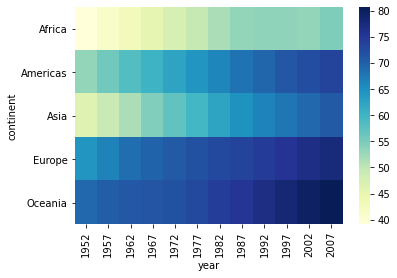

In [5]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

We get a simple heatmap instantly highlighting the trend in the data with values of the color scale on the right. From this heatmap, we can see that the life expectancy in Africa and Asia improved over the years, with Asia doing much better than Africa and so on.

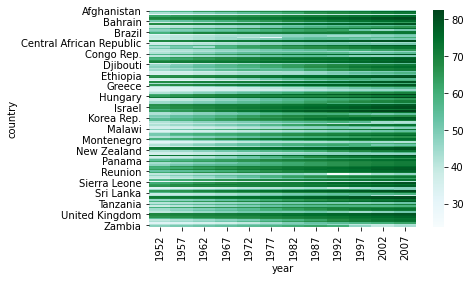

In [6]:
df2 = gapminder[['country','continent', 'year','lifeExp']]
heatmap2_data = pd.pivot_table(df2,values='lifeExp', index=['country'], columns='year')
sns.heatmap(heatmap2_data, cmap="BuGn")

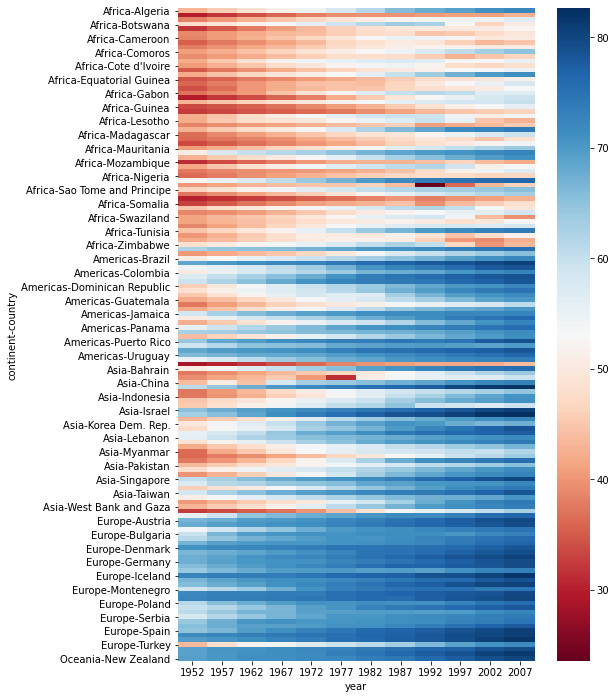

In [7]:
df3 = gapminder[['country','continent', 'year','lifeExp']]
# pandas pivot with multiple variables
heatmap3_data = pd.pivot_table(df3,values='lifeExp', index=['continent','country'], columns='year')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap3_data, cmap="RdBu")

In [8]:
array_2d = np.linspace(1,5,12).reshape(4,3) # create numpy 2D array
print(array_2d) # print numpy array

[[1.         1.36363636 1.72727273]
 [2.09090909 2.45454545 2.81818182]
 [3.18181818 3.54545455 3.90909091]
 [4.27272727 4.63636364 5.        ]]


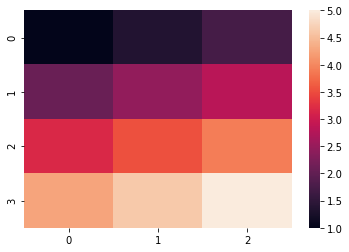

In [9]:
sns.heatmap(array_2d) # create heatmap

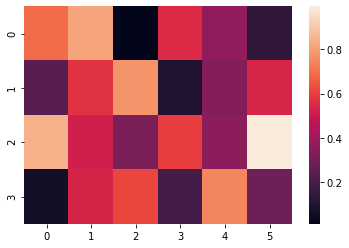

In [10]:
data = np.random.rand(4, 6)
sns.heatmap(data)

In [11]:
data = np.random.rand(4, 6)
data

array([[0.52456833, 0.35785481, 0.83023141, 0.79122015, 0.56014743,
        0.38530319],
       [0.53410375, 0.94108425, 0.04730708, 0.83737782, 0.14037124,
        0.03012416],
       [0.97490068, 0.8733092 , 0.91973663, 0.93109683, 0.00623147,
        0.3689016 ],
       [0.11908743, 0.077852  , 0.08568494, 0.06300337, 0.50067579,
        0.91782922]])

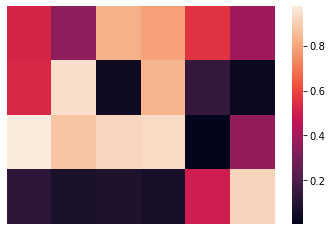

In [12]:
### Remove heatmap x y tick labels
sns.heatmap(data, xticklabels=False, yticklabels=False)

Text(33.0, 0.5, 'Values on Y axis')

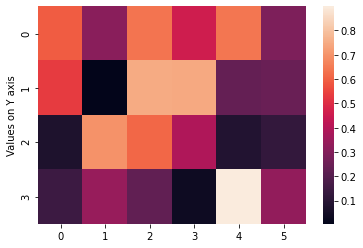

In [13]:
#Set heatmap y axis label
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data)
plt.ylabel('Values on Y axis')

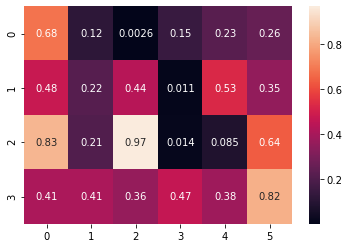

In [14]:
# Add text over heatmap
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data, annot=True)
plt.show()

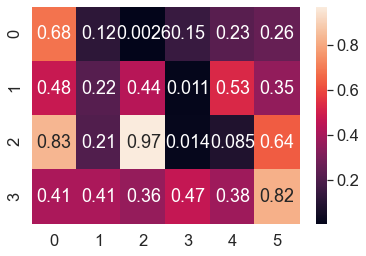

In [15]:
# Adjust heatmap font size
sns.set(font_scale=1.5)
sns.heatmap(data, annot=True)

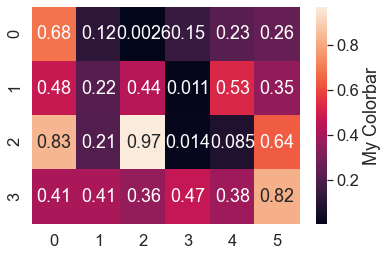

In [16]:
sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar'})

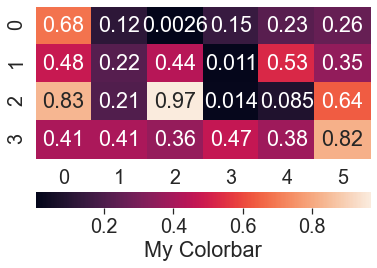

In [17]:
sns.set(font_scale=1.8)
heat_map = sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})
plt.show()

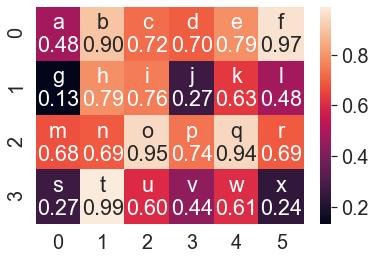

In [18]:
data = np.random.rand(4, 6)
text = np.asarray([['a', 'b', 'c', 'd', 'e', 'f'], ['g', 'h', 'i', 'j', 'k', 'l'], ['m', 'n', 'o', 'p', 'q', 'r'], ['s', 't', 'u', 'v', 'w', 'x']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(4,6)
heat_map = sns.heatmap(data, annot=labels, fmt='')

### Pipeline
A pipeline is what chains several steps together, once the initial exploration is done. For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm, such as random forest or support vector machine, they are estimators. Pipeline chains all these together which can then be applied to training data en bloc.

data = pd.read_csv("pima-data.csv")
data.head()

from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy = 'most_frequent')),
          ('clf', DecisionTreeClassifier())]
pipeline = Pipeline(steps)
clf = pipeline.fit(X_train,y_train)

import numpy as np
import pandas as pd

df = pd.read_csv('Purchased_Dataset.csv')
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy').mean())

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, x, y, cv=10, scoring = 'accuracy').mean())

### Line plots

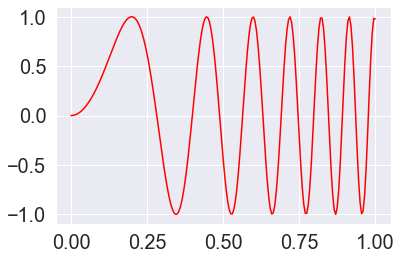

In [20]:
x = np.linspace(0, 1, 201)
y = np.sin((2*np.pi*x)**2)
plt.plot(x, y, 'red')
plt.show()

### Scatter plots

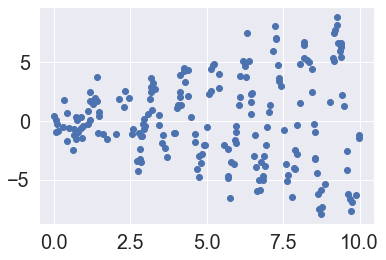

In [21]:
x = 10*np.random.rand(200,1)
y = (0.2 + 0.8*x) * np.sin(2*np.pi*x) + np.random.randn(200,1)
plt.scatter(x,y)
plt.show()

### Histograms

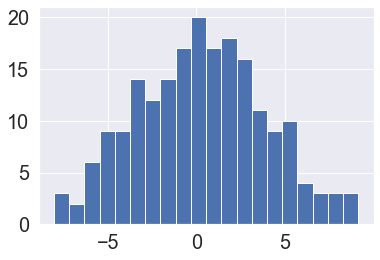

In [22]:
x = 10*np.random.rand(200,1)
y = (0.2 + 0.8*x) * np.sin(2*np.pi*x) + np.random.randn(200,1)
plt.hist(y, bins=20)
plt.show()

### Using axes()